In [9]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


**1.Data Set Selection**

In [10]:
#Load the data
file_path = 'wine-quality-white-and-red.csv' 
data = pd.read_csv(file_path)

#Display the 5 first rows
print(data.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

**2.DATA ANALYSIS**

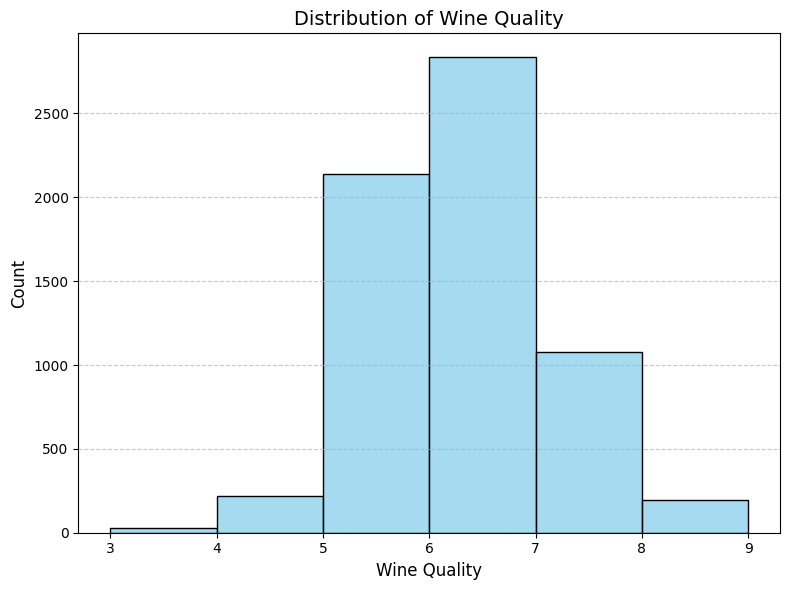

In [11]:
# Visualization 1: Histogram of Quality Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['quality'], kde=False, bins=6, color="skyblue", edgecolor="black")
plt.title('Distribution of Wine Quality', fontsize=14)
plt.xlabel('Wine Quality', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Why this graph?**  
This histogram highlights the overall distribution of wine quality scores in the dataset, providing insight into the target variable's balance. It allows us to assess whether certain quality levels are over- or under-represented, which is critical for understanding any potential bias in the dataset.

**Significance:**  
- Identifies which quality scores are most common.  
- Helps determine whether the target variable is imbalanced, which is crucial when selecting a machine learning model or metric for evaluation.

---

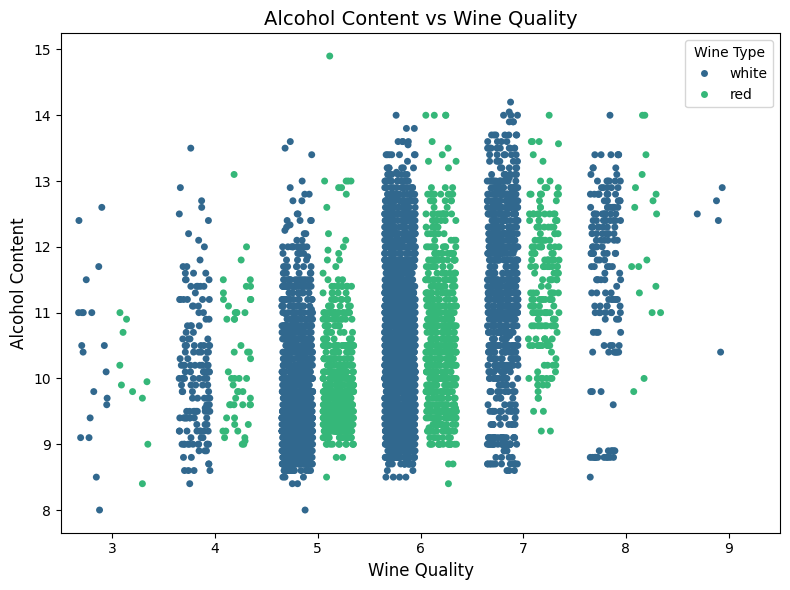

In [12]:
# Visualization 2: Alcohol vs Quality using Stripplot
plt.figure(figsize=(8, 6))
sns.stripplot(x=data['quality'], y=data['alcohol'], hue=data['type'], jitter=0.3, palette='viridis', dodge=True, size=5)
plt.title('Alcohol Content vs Wine Quality', fontsize=14)
plt.xlabel('Wine Quality', fontsize=12)
plt.ylabel('Alcohol Content', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Wine Type')
plt.tight_layout()
plt.show()

**Why this graph?**  
Alcohol content is a critical feature in wine analysis, often influencing quality perception. The stripplot reveals how alcohol content varies across different wine quality levels and allows us to observe clustering or trends.

**Significance:**  
- Demonstrates whether higher alcohol content correlates with higher wine quality.  
- Identifies potential outliers or overlapping patterns, helping us decide if alcohol content is a reliable predictor for wine quality.

---

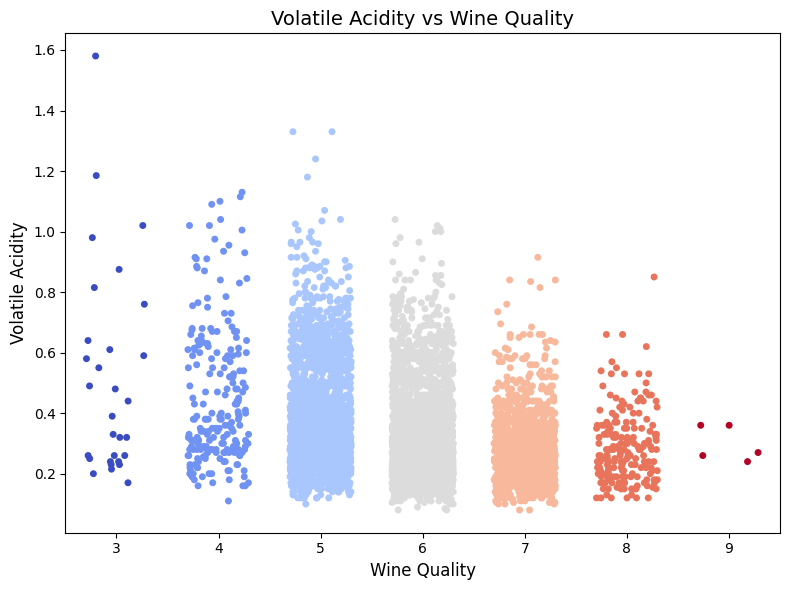

In [13]:
# Visualization 3: Volatile Acidity vs Quality using Stripplot
plt.figure(figsize=(8, 6))
sns.stripplot(
    x=data['quality'], 
    y=data['volatile acidity'], 
    hue=data['quality'],  # Adding hue to differentiate categories
    jitter=0.3, 
    palette='coolwarm', 
    size=5, 
    legend=False  # Hides the legend if not needed
)
plt.title('Volatile Acidity vs Wine Quality', fontsize=14)
plt.xlabel('Wine Quality', fontsize=12)
plt.ylabel('Volatile Acidity', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



**Why this graph?**  
Volatile acidity often affects the taste and aroma of wine, impacting its overall quality. This stripplot allows us to investigate whether higher or lower volatile acidity correlates with quality scores.

**Significance:**  
- Highlights any inverse relationships between volatile acidity and wine quality.  
- Allows us to visually identify whether volatile acidity has a stronger influence on lower or higher wine quality scores.

---

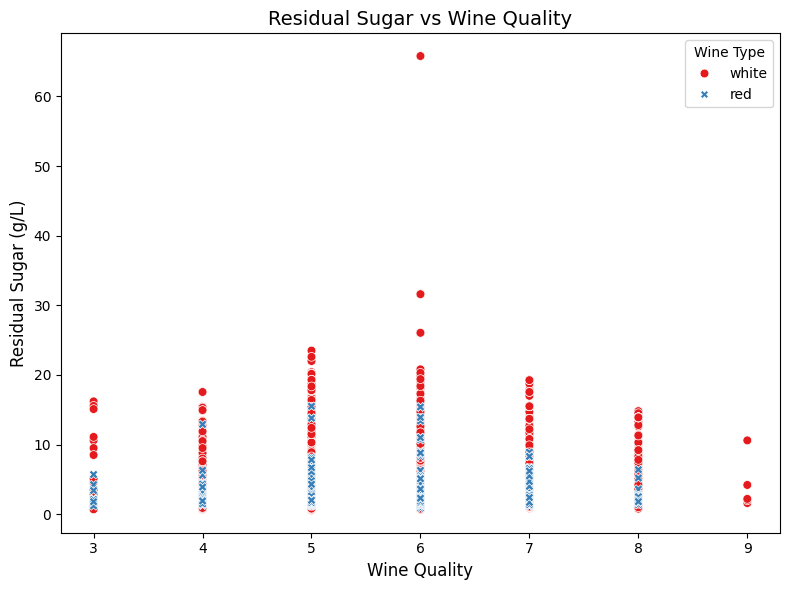

In [14]:
# Visualization 4: Residual Sugar vs Quality using Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['quality'], y=data['residual sugar'], hue=data['type'], style=data['type'], s=40, palette='Set1')
plt.title('Residual Sugar vs Wine Quality', fontsize=14)
plt.xlabel('Wine Quality', fontsize=12)
plt.ylabel('Residual Sugar (g/L)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Wine Type')
plt.tight_layout()
plt.show()

**Why this graph?**  
Residual sugar can significantly influence the taste of wine, particularly for sweet wines. By plotting residual sugar against quality and separating wine types (red and white), we can see how sugar content varies by quality and type.

**Significance:**  
- Distinguishes patterns or clustering of residual sugar between red and white wines.  
- Provides insight into whether residual sugar contributes differently to the perceived quality of red vs. white wines.

---

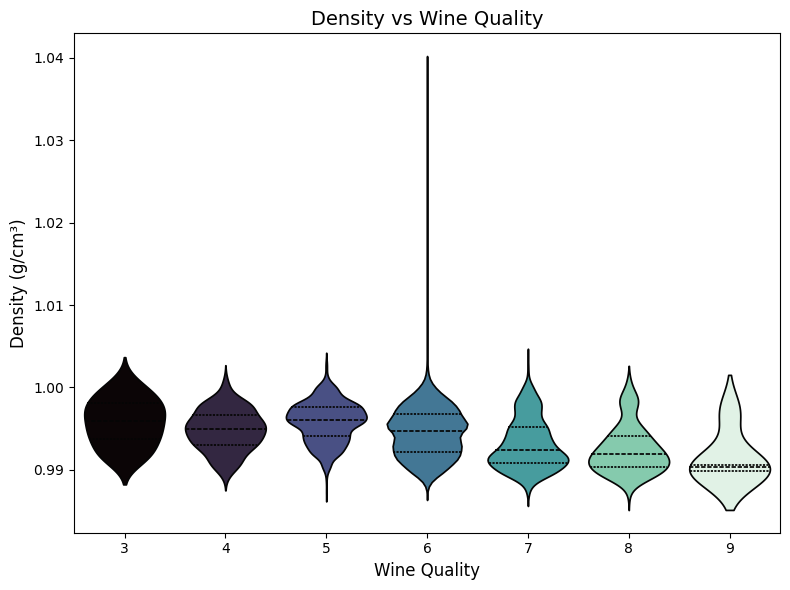

In [15]:
# Visualization 5: Density vs Quality using Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(
    x=data['quality'], 
    y=data['density'], 
    hue=data['quality'],  # Assign the `x` variable to `hue` for proper color mapping
    palette='mako', 
    inner='quartile', 
    dodge=False  # Prevents splitting the violins by hue
)
plt.title('Density vs Wine Quality', fontsize=14)
plt.xlabel('Wine Quality', fontsize=12)
plt.ylabel('Density (g/cm³)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend([],[], frameon=False)  # Optionally hide legend if unnecessary
plt.tight_layout()
plt.show()



**3.Basic Model Pipeline**

**Why this graph?**  
Density is related to sugar and alcohol levels in wine, which are important characteristics that impact quality. The violin plot provides a clear view of the distribution of density across wine quality levels.

**Significance:**  
- Shows the spread of density values for each quality score, highlighting potential differences between quality levels.  
- Combines boxplot and kernel density estimation to present both central tendency and variability.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

# Convert the 'type' column (categorical) to numerical using Label Encoding
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])

# Prepare features (X) and target (y)
# Assuming 'quality' is the target column
X = data.drop(columns=['quality'])  # Features: all columns except 'quality'
y = data['quality']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on both training and testing sets
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

# Print results
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Training RMSE: 0.64
Test RMSE: 0.64
R² Score: 0.42


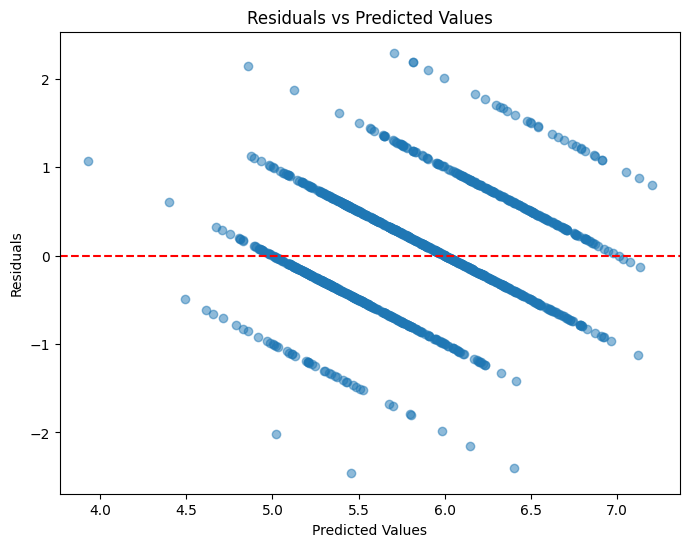

In [17]:
# Calculate residuals
residuals = y_test - y_pred_test

# Plot residuals vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()